In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Importing dataset
df = pd.read_csv('https://query.data.world/s/arp3hzrar7ovubxdepedk23p6iesid')

In [3]:
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577462 entries, 0 to 577461
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             577462 non-null  object 
 1   AverageTemperature             544811 non-null  float64
 2   AverageTemperatureUncertainty  545550 non-null  float64
 3   Country                        577462 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.6+ MB


# Data cleaning

In [5]:
# Converting 'dt' column to 'datetime' object.

df['dt'] = pd.to_datetime(df['dt'])

In [6]:
# Adding column 'year'

df['year'] = df['dt'].apply(lambda x : x.year)

In [7]:
df = df.sort_values(by='year') # Sorting

In [8]:
df = df.set_index('year')  # Setting year as index

In [9]:
df.head(3)

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
year,,,,
1743,1743-11-01,4.384,2.294,Åland
1743,1743-11-01,10.692,1.857,Guernsey
1743,1743-12-01,NaN,NaN,Guernsey


In [10]:
df = df.loc[2000:]  # Filtering the data from year 2000

In [11]:
df = df[df['Country']=='India']  # Extracting data of 'india'

# Data preprocess

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165 entries, 2000 to 2013
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   dt                             165 non-null    datetime64[ns]
 1   AverageTemperature             164 non-null    float64       
 2   AverageTemperatureUncertainty  164 non-null    float64       
 3   Country                        165 non-null    object        
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 6.4+ KB


In [13]:
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
year,,,,
2000,2000-07-01,26.980,0.260,India
2000,2000-08-01,26.821,0.306,India
2000,2000-09-01,26.505,0.134,India
2000,2000-10-01,25.583,0.222,India
2000,2000-11-01,21.986,0.157,India


In [14]:
df = df.reset_index()

In [15]:
df.sort_values('dt',inplace=True)

In [16]:
df

,year,dt,AverageTemperature,AverageTemperatureUncertainty,Country
10,2000,2000-01-01,17.840,0.210,India
11,2000,2000-02-01,19.071,0.159,India
9,2000,2000-03-01,23.674,0.183,India
8,2000,2000-04-01,28.868,0.190,India
7,2000,2000-05-01,30.089,0.166,India
...,...,...,...,...,...
160,2013,2013-05-01,31.014,0.205,India
159,2013,2013-06-01,28.766,0.299,India
158,2013,2013-07-01,27.012,0.197,India
157,2013,2013-08-01,26.555,0.242,India


In [17]:
df = df.drop(['year','AverageTemperatureUncertainty','Country'] , axis=1)

In [18]:
df = df.dropna()

In [19]:
df.head()

,dt,AverageTemperature
10,2000-01-01,17.840
11,2000-02-01,19.071
9,2000-03-01,23.674
8,2000-04-01,28.868
7,2000-05-01,30.089


In [20]:
df.set_index('dt',inplace=True)

In [21]:
df.head()

,AverageTemperature
dt,
2000-01-01,17.840
2000-02-01,19.071
2000-03-01,23.674
2000-04-01,28.868
2000-05-01,30.089


In [22]:
# Check for missing values
df.isna().sum()

AverageTemperature    0
dtype: int64

# Anamoly detection

In [23]:
month_deviations = df.groupby(lambda d: d.month).std()

Text(0, 0.5, 'temperatures')

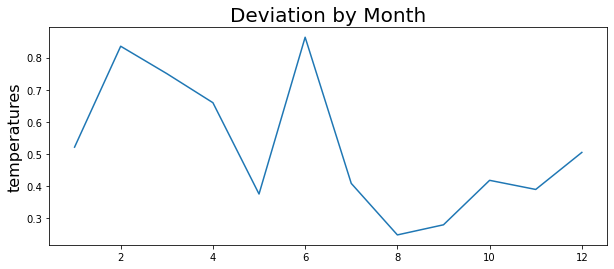

In [24]:
plt.figure(figsize=(10,4))
plt.plot(month_deviations)
plt.title('Deviation by Month', fontsize=20)
plt.ylabel('temperatures', fontsize=16)

# Moving Average

Text(0.5, 1.0, 'Average temperature recorded per year')

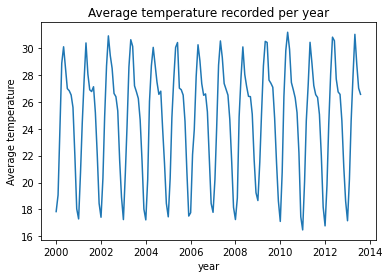

In [25]:
plt.plot(df['AverageTemperature'])
plt.xlabel('year')
plt.ylabel('Average temperature')
plt.title('Average temperature recorded per year')

In [26]:
# 12 month moving average
df['mavg_12'] = df['AverageTemperature'].rolling(window=12).mean().shift(1)

In [27]:
df

,AverageTemperature,mavg_12
dt,,
2000-01-01,17.840,NaN
2000-02-01,19.071,NaN
2000-03-01,23.674,NaN
2000-04-01,28.868,NaN
2000-05-01,30.089,NaN
...,...,...
2013-04-01,27.981,24.728750
2013-05-01,31.014,24.721583
2013-06-01,28.766,24.739000


In [28]:
# Forecasted prices are last 12 rows
df[['AverageTemperature','mavg_12']]['2012-9-01':]

,AverageTemperature,mavg_12
dt,,
2012-09-01,26.551,24.691833
2012-10-01,24.590,24.711000
2012-11-01,21.162,24.671750
2012-12-01,18.622,24.603417
2013-01-01,17.160,24.640833
2013-02-01,20.243,24.672667
2013-03-01,24.575,24.710333
2013-04-01,27.981,24.728750
2013-05-01,31.014,24.721583


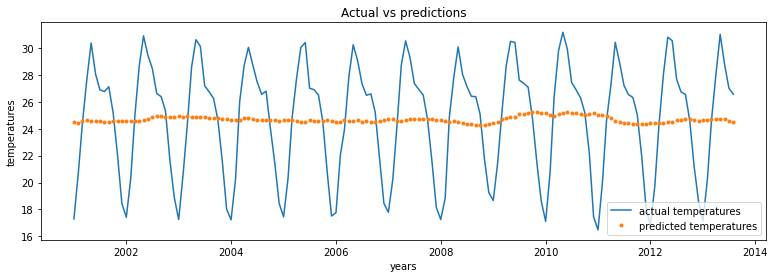

In [29]:
# Plotting predictions with actual values
plt.figure(figsize=(13,4))
plt.plot(df['AverageTemperature'][12:] , label = 'actual temperatures');
plt.plot(df['mavg_12'][12:] , '.' , label = 'predicted temperatures');
plt.xlabel('years')
plt.ylabel('temperatures')
plt.title('Actual vs predictions')
plt.legend()

In [30]:
# Accuracy - MAPE

def get_mape(actual,pred):
    y_true , y_pred = np.array(actual) , np.array(pred)
    return np.round(np.mean(np.abs((actual-pred) / actual)) * 100 , 2)

In [31]:
df[['AverageTemperature','mavg_12']]

,AverageTemperature,mavg_12
dt,,
2000-01-01,17.840,NaN
2000-02-01,19.071,NaN
2000-03-01,23.674,NaN
2000-04-01,28.868,NaN
2000-05-01,30.089,NaN
...,...,...
2013-04-01,27.981,24.728750
2013-05-01,31.014,24.721583
2013-06-01,28.766,24.739000


In [32]:
get_mape(df['AverageTemperature']['2012-9-01':].values , df['mavg_12']['2012-9-01':].values)

15.39

In [33]:
from sklearn import metrics

In [34]:
# RMSE
np.sqrt(metrics.mean_squared_error(df['AverageTemperature']['2012-9-01':].values , df['mavg_12']['2012-9-01':].values))

4.11805555581319

# Exponential smooting

In [35]:
df['ewm'] = df['AverageTemperature'].ewm(alpha=0.2).mean()

In [36]:
# Forecasted prices are last 12 rows 
df[['AverageTemperature','mavg_12' , 'ewm']]['2012-9-01':]

,AverageTemperature,mavg_12,ewm
dt,,,
2012-09-01,26.551,24.691833,26.478789
2012-10-01,24.590,24.711000,26.101031
2012-11-01,21.162,24.671750,25.113225
2012-12-01,18.622,24.603417,23.814980
2013-01-01,17.160,24.640833,22.483984
2013-02-01,20.243,24.672667,22.035787
2013-03-01,24.575,24.710333,22.543630
2013-04-01,27.981,24.728750,23.631104
2013-05-01,31.014,24.721583,25.107683


In [37]:
get_mape(df['AverageTemperature']['2012-9-01':].values ,  df['ewm']['2012-9-01':].values)

12.57

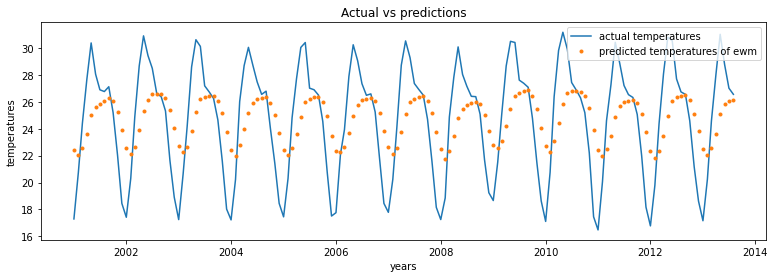

In [38]:
# Plotting predictions of ewm with actual values
plt.figure(figsize=(13,4))
plt.plot(df['AverageTemperature'][12:] , label = 'actual temperatures');
plt.plot(df['ewm'][12:] , '.' , label = 'predicted temperatures of ewm');
plt.xlabel('years')
plt.ylabel('temperatures')
plt.title('Actual vs predictions')
plt.legend()

# Seasonal decomposition

In [39]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [40]:
f = seasonal_decompose(np.array(df['AverageTemperature']) , model = 'mul' , freq=12)

<ipython-input-40-2461872d7d92>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  f = seasonal_decompose(np.array(df['AverageTemperature']) , model = 'mul' , freq=12)


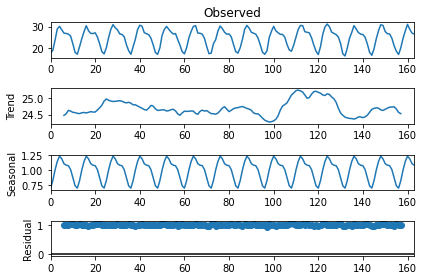

In [41]:
f.plot();

# Check for stationarity in data

In [42]:
from statsmodels.tsa.stattools import adfuller

In [43]:
def test(ts):
    result = adfuller(ts , autolag=None)
    out = pd.Series(result[0:4] , index=['Test statistic' , 'p-value' , 'lags_used' , '# observations used'])
    print(out)

In [44]:
test(df['AverageTemperature'])

Test statistic          -2.610248
p-value                  0.090898
lags_used               14.000000
# observations used    149.000000
dtype: float64


# ACF , PACF

In [45]:
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf

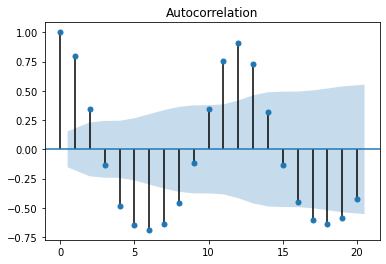

In [46]:
acf_plot = plot_acf(df['AverageTemperature'] , lags = 20)

C:\Users\USER\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


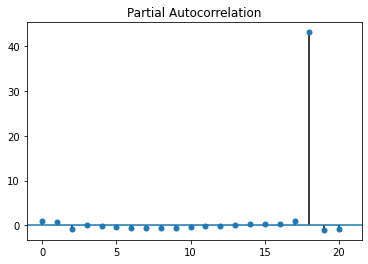

In [47]:
pacf_plot = plot_pacf(df['AverageTemperature'] , lags=20)

In [48]:
df

,AverageTemperature,mavg_12,ewm
dt,,,
2000-01-01,17.840,NaN,17.840000
2000-02-01,19.071,NaN,18.523889
2000-03-01,23.674,NaN,20.634590
2000-04-01,28.868,NaN,23.423686
2000-05-01,30.089,NaN,25.406466
...,...,...,...
2013-04-01,27.981,24.728750,23.631104
2013-05-01,31.014,24.721583,25.107683
2013-06-01,28.766,24.739000,25.839346


In [49]:
df.index.freq = 'MS'

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 164 entries, 2000-01-01 to 2013-08-01
Freq: MS
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   AverageTemperature  164 non-null    float64
 1   mavg_12             152 non-null    float64
 2   ewm                 164 non-null    float64
dtypes: float64(3)
memory usage: 10.1 KB


In [76]:
# Data split
train = df[0:131]  # 80% for training the model
test = df[131:] # 20% for testing model

# ARMA

In [52]:
from statsmodels.tsa.arima_model import ARIMA

In [54]:
model = ARIMA(train, order=(1,0,1)).fit()

In [55]:
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                             Results: ARMA
========================================================================
Model:                ARMA               BIC:                 552.1272  
Dependent Variable:   AverageTemperature Log-Likelihood:      -266.31   
Date:                 2020-08-19 14:22   Scale:               1.0000    
No. Observations:     131                Method:              css-mle   
Df Model:             3                  Sample:              01-01-2000
Df Residuals:         128                                     11-01-2010
Converged:            1.0000             S.D. of innovations: 1.833     
No. Iterations:       8.0000             HQIC:                545.300   
AIC:                  540.6264                                          
------------------------------------------------------------------------
                          Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
------------------------------------------------------------------------
const                    24.5083   0.9600 25.5290 0.0000 22.6267 26.3899
ar.L1.AverageTemperature  0.7284   0.0623 11.6842 0.0000  0.6062  0.8506
ma.L1.AverageTemperature  0.6621   0.0526 12.5930 0.0000  0.5591  0.7652
----------------------------------------------------------------------------------
                   Real            Imaginary           Modulus           Frequency
----------------------------------------------------------------------------------
AR.1              1.3728              0.0000            1.3728              0.0000
MA.1             -1.5103              0.0000            1.5103              0.5000
========================================================================

"""

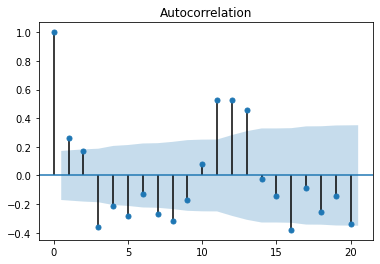

In [56]:
# Model residuals

plot_acf(model.resid,lags=20);

# Forecasting

In [58]:
predictions , stderror , ci = model.forecast(steps=33)

In [59]:
len(predictions)

33

In [60]:
predictions.shape

(33,)

In [61]:
len(test)

33

In [62]:
test.shape

(33,)

In [64]:
get_mape(test , predictions)

16.03